In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [2]:
dataset = pd.read_csv('totalwithmaininfo.csv')
dataset = dataset.drop(dataset.columns[2],axis=1)

In [3]:
#dataset.head()

In [4]:
dataset = dataset[dataset.Y != 5.0]  
dataset.loc[dataset.Y == 0.0, "Y"] = int(0)
dataset.loc[dataset.Y == 10.0, "Y"] = int(1)

In [5]:
train_percentage = 17/22
train_index = int(len(dataset)*train_percentage)
test_index = len(dataset)-train_index

In [6]:
df_train = dataset[:train_index]
df_test = dataset[-test_index:]

In [7]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [8]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [9]:
X_train.to_csv("E:\\NEW USER KALLA\\AML project\\AML project\\Output.csv")

In [10]:
y_test.to_csv("E:\\NEW USER KALLA\\AML project\\AML project\\Output_test.csv")

In [11]:
def average(y_pred):
    """Averaging sequential frames for classifier"""
    for i in range(1, len(y_pred)-1):
        if i % 240 == 0 or (i+1) % 240 == 0:
            pass
        else: 
            average = float(y_pred[i-1] + y_pred[i] + y_pred[i+1])/3
            if average >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
    return y_pred

In [12]:
clf = LogisticRegression(solver='sag').fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1, average='micro')
roc_1 = metrics.roc_auc_score(y_test, y_score_1, average='micro', multi_class="ovo")
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))

[0.8633643617021277, 0.8633643617021277, 0.9217414065443585]
[[1097  175]
 [ 236 1500]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1272
         1.0       0.90      0.86      0.88      1736

    accuracy                           0.86      3008
   macro avg       0.86      0.86      0.86      3008
weighted avg       0.86      0.86      0.86      3008



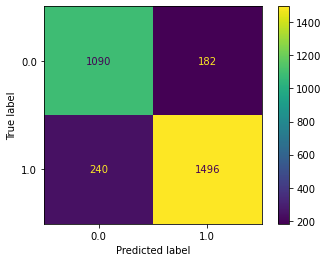

In [14]:
plot_confusion_matrix(clf, X_test, y_test)

In [15]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB, average='micro')
roc_2 = metrics.roc_auc_score(y_test, y_score_2, average='micro', multi_class="ovo")
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))

[0.831781914893617, 0.8317819148936171, 0.9179425973828362]
[[ 955  317]
 [ 189 1547]]


In [16]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      1272
         1.0       0.83      0.89      0.86      1736

    accuracy                           0.83      3008
   macro avg       0.83      0.82      0.83      3008
weighted avg       0.83      0.83      0.83      3008



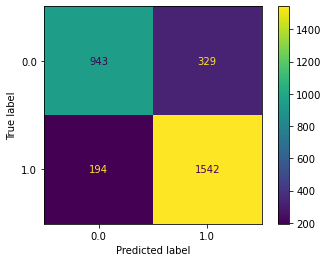

In [17]:
plot_confusion_matrix(clf_NB, X_test, y_test)

In [18]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN, average='micro'))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3, average='micro', multi_class="ovo"))

In [19]:
acc3_list.index(max(acc3_list))+1

29

In [20]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN, average='micro')
roc_3 = metrics.roc_auc_score(y_test, y_score_3, average='micro', multi_class="ovo")
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))

[0.8766622340425532, 0.8766622340425532, 0.9329585017969452]
[[1136  136]
 [ 235 1501]]


In [21]:
print(classification_report(y_test, pred_KN))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1272
         1.0       0.92      0.86      0.89      1736

    accuracy                           0.88      3008
   macro avg       0.87      0.88      0.87      3008
weighted avg       0.88      0.88      0.88      3008



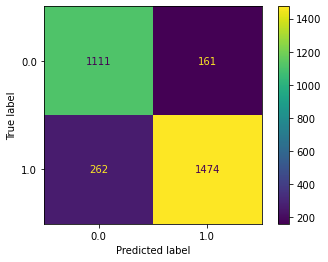

In [22]:
plot_confusion_matrix(neigh, X_test, y_test)

In [23]:
from sklearn.neural_network import MLPClassifier

F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']
for j in activation:
    for i in optimizer:
        for k in hidden_units:
            clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver= i)
            clf_MLP.fit(X_train, y_train)
            pred_MLP = clf_MLP.predict(X_test)
            pred_MLP = average(pred_MLP)
            y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
            acc4_list.append(accuracy_score(y_test,pred_MLP))
            roc_4_list.append(metrics.roc_auc_score(y_test, y_score_4, average='micro', multi_class="ovo"))
            F1_score_4_list.append(metrics.f1_score(y_test, pred_MLP, average='micro'))
            mlp.append([j,i,k])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [24]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.8853058510638298
Best Combination: ['relu', 'lbfgs', 40]


In [25]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][2], activation =  mlp[min_index][0], solver= mlp[min_index][1])
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
pred_MLP = average(pred_MLP)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
acc4 = accuracy_score(y_test,pred_MLP)
f1_score_4 = metrics.f1_score(y_test, pred_MLP, pos_label=10.0, average='micro')
roc_4 = metrics.roc_auc_score(y_test, y_score_4, average='micro', multi_class="ovo")
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(y_test, pred_MLP))

[0.8141622340425532, 0.8141622340425533, 0.9380425252876562]
[[1243   29]
 [ 530 1206]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 10.0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [26]:
print(classification_report(y_test, pred_MLP))

              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82      1272
         1.0       0.98      0.69      0.81      1736

    accuracy                           0.81      3008
   macro avg       0.84      0.84      0.81      3008
weighted avg       0.86      0.81      0.81      3008



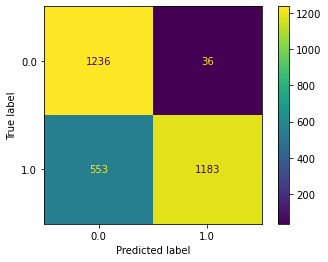

In [27]:
plot_confusion_matrix(clf_MLP, X_test, y_test)

In [28]:
from sklearn.tree import DecisionTreeClassifier
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc5))

0.867686170212766


In [29]:
best_depth = max_depth[acc5.index(max(acc5))]
best_depth

5

In [30]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT, average='micro')
roc_5 = metrics.roc_auc_score(y_test, y_score_5, average='micro', multi_class="ovo")
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_DT))

[0.867686170212766, 0.867686170212766, 0.8289156921137292]
[[1223   49]
 [ 349 1387]]


In [31]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      1272
         1.0       0.97      0.80      0.87      1736

    accuracy                           0.87      3008
   macro avg       0.87      0.88      0.87      3008
weighted avg       0.89      0.87      0.87      3008



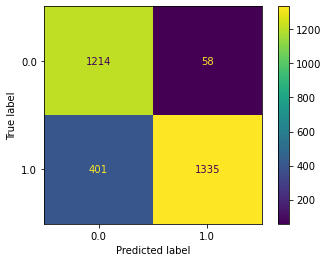

In [32]:
plot_confusion_matrix(clf_DT, X_test, y_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

0.8809840425531915


In [34]:
best_depth_6 = max_depth[acc6.index(max(acc6))]
best_depth_6

4

In [35]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF, average='micro')
roc_6 = metrics.roc_auc_score(y_test, y_score_6, average='micro', multi_class="ovo")
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

[0.8816489361702128, 0.8816489361702128, 0.9333081090774715]
[[1193   79]
 [ 277 1459]]


In [36]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1272
         1.0       0.95      0.84      0.89      1736

    accuracy                           0.88      3008
   macro avg       0.88      0.89      0.88      3008
weighted avg       0.89      0.88      0.88      3008



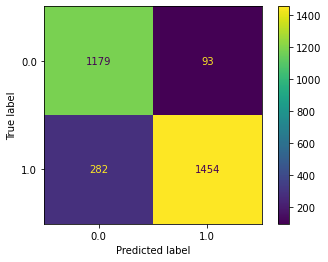

In [37]:
plot_confusion_matrix(clf_RF, X_test, y_test)

In [38]:
#!pip install xgboost

In [39]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB, average='micro')
roc_8 = metrics.roc_auc_score(y_test, y_score_8, average='micro', multi_class="ovo")
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))

[0.793218085106383, 0.793218085106383, 0.8680015143610702]
[[1253   19]
 [ 603 1133]]


In [40]:
print(classification_report(y_test, pred_XGB))

              precision    recall  f1-score   support

         0.0       0.68      0.99      0.80      1272
         1.0       0.98      0.65      0.78      1736

    accuracy                           0.79      3008
   macro avg       0.83      0.82      0.79      3008
weighted avg       0.85      0.79      0.79      3008



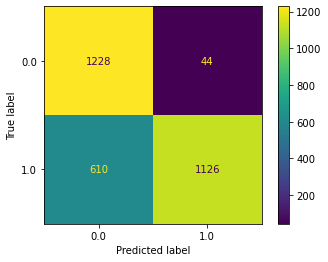

In [41]:
plot_confusion_matrix(clf_XGB, X_test, y_test)

In [42]:
feature_importances

,importance
MOE_N,0.325734
MAR_N,0.201276
MOE,0.138188
EAR_N,0.109863
EAR,0.086567
MAR,0.055105
Circularity_N,0.042791
Circularity,0.040476


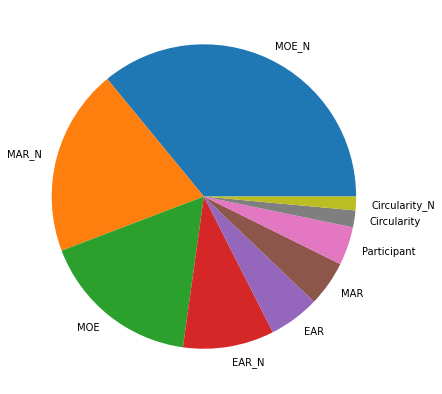

In [43]:
 # Creating dataset
cars = ['MOE_N', 'MAR_N', 'MOE',
        'EAR_N', 'EAR', 'MAR','Participant', 'Circularity', 'Circularity_N']
 
data = [0.359541*100, 0.1983171*100, 0.170130*100, 0.096813*100, 0.053846*100, 0.048162*100, 0.040690*100, 0.017931*100, 0.014571*100]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
 
# show plot
plt.show()

In [44]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_train_shaped.shape

(10227, 8, 1)

In [45]:
X_test_shaped = np.expand_dims(X_test, axis=2)
X_test_shaped.shape

(3008, 8, 1)

In [46]:
# !pip install keras
# !pip install tensorflow

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


320/320 [==============================] - 1s 1ms/step - loss: 0.6699 - accuracy: 0.5241 - val_loss: 0.5976 - val_accuracy: 0.5834
Epoch 2/100
320/320 [==============================] - 0s 943us/step - loss: 0.6368 - accuracy: 0.6203 - val_loss: 0.5955 - val_accuracy: 0.6729
Epoch 3/100
320/320 [==============================] - 0s 919us/step - loss: 0.6123 - accuracy: 0.6860 - val_loss: 0.5891 - val_accuracy: 0.7793
Epoch 4/100
320/320 [==============================] - 0s 954us/step - loss: 0.5965 - accuracy: 0.7138 - val_loss: 0.5772 - val_accuracy: 0.8191
Epoch 5/100
320/320 [==============================] - 0s 987us/step - loss: 0.5803 - accuracy: 0.7435 - val_loss: 0.5635 - val_accuracy: 0.8421
Epoch 6/100
320/320 [==============================] - 0s 942us/step - loss: 0.5687 - accuracy: 0.7490 - val_loss: 0.5520 - val_accuracy: 0.8614
Epoch 7/100
320/320 [==============================] - 0s 969us/step - loss: 0.5601 - accuracy: 0.7572 - val_loss: 0.5393 - val_accuracy: 0.8697

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             256       
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 32)                12320     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-traina

In [49]:
pred_cnn = np.argmax(X_test_shaped,axis=1)
pred_cnn = average(pred_cnn)
y_score_7 = np.argmax(X_test_shaped,axis=1)
acc7 = accuracy_score(y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(y_test, pred_cnn, average='micro')
roc_7 = metrics.roc_auc_score(y_test, y_score_7, average='micro', multi_class="ovo")
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_cnn))

[0.42154255319148937, 0.42154255319148937, 0.4992138364779874]
[[1268    4]
 [1736    0]]


,Accuracy
Model,
Logistic Regression,0.863364
Naive Bayes,0.831782
KNN,0.876662
MLP,0.814162
Decision Tree,0.867686
Random Forest,0.881649
CNN,0.421543
XGB Boosting,0.793218


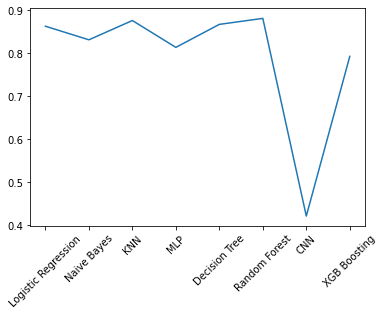

In [50]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN', 'MLP','Decision Tree','Random Forest', 'CNN', 'XGB Boosting'],
        'Accuracy':[acc1,acc2, acc3, acc4, acc5,acc6,acc7, acc8]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total

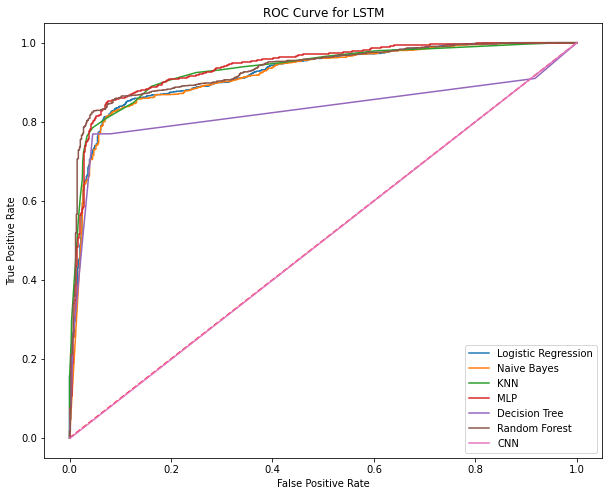

In [51]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_4)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_6)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_7)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "MLP")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

ValueError: y_prob has values outside [0, 1] and normalize is set to False.

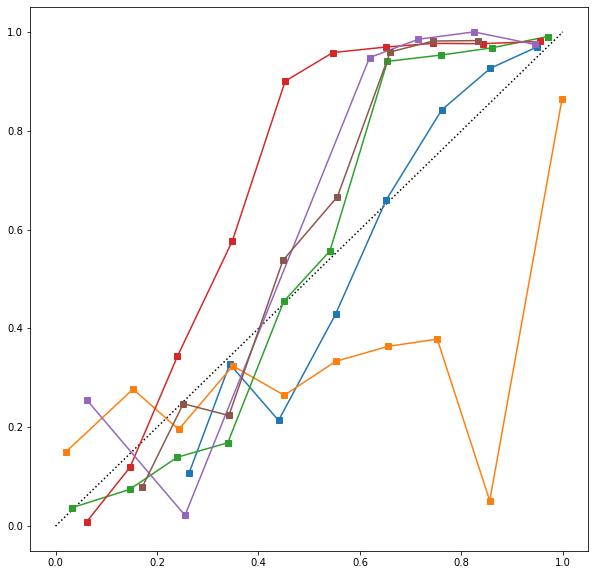

In [52]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_1,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_2,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_3,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_4,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'MLP')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_5,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_6,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_7,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")

In [ ]:
#!pip install torchvision
#!pip install opencv-python

In [53]:
import torch
import torchvision
import glob
import cv2
from torchvision import transforms

In [54]:
# seed for testing
torch.manual_seed(0) 
# agnostic cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [55]:
def copy_imgs(participants, train_set = True):
    """Helper function for copying and centralizing images"""
    x = [int(x) for x in participants]
    train_set = False
    fileList_a, fileList_d = [], []
    for i in x:
        alert_states = len(glob.glob("img\\"+str(i)+"\\p"+str(i)+"_s0*"))
        drowsy_states = len(glob.glob("img\\"+str(i)+"\\p"+str(i)+"_s10*"))
        MIN_T = 0 if train_set else int((alert_states*0.8))+1
        MAX_T = int((alert_states*0.8)) if train_set else alert_states
        for j in np.arange(MIN_T, MAX_T):
            fileList_a.append(str(i)+"\\p"+str(i)+"_s0_"+str(j)+"sec.jpg")
        MIN_T = 0 if train_set else int((drowsy_states*0.8))+1
        MAX_T = int((drowsy_states*0.8)) if train_set else drowsy_states
        for j in np.arange(MIN_T, MAX_T):
            fileList_d.append(str(i)+"\\p"+str(i)+"_s10_"+str(j)+"sec.jpg")
    
    for item in fileList_a:
        if not (os.path.isfile(r'img\\'+str(item))):
            print("Not found", item)
            continue
        if train_set:
            shutil.copy(r'img\\'+str(item), r'cnn_train\0\\')
        else:
            shutil.copy(r'img\\'+str(item), r'cnn_test\0\\')
    
    for item in fileList_d:
        if not (os.path.isfile(r'img\\'+str(item))):
            print("Not found", item)
            continue
        if train_set:
            shutil.copy(r'img\\'+str(item), r'cnn_train\1\\')
        else:
            shutil.copy(r'img\\'+str(item), r'cnn_test\1\\')

In [56]:
%%time
# Create a folder for training and test images and copy the extracted images into it
# Used schema: <source>img\\{item} <destination>cnn_train\\{item}
participants = set(pd.read_csv('totalwithmaininfo.csv',sep=',').Participant)
copy_imgs(participants, train_set=True) #if set to false, then the test set is copied
copy_imgs(participants, train_set=False)

Wall time: 42 ms


In [57]:
def calibration(detector, predictor, cap = cv2.VideoCapture(0)):
    """Helper function for determing mean and std"""
    
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10,400)
    fontScale              = 1
    fontColor              = (255,255,255)
    lineType               = 2
    data = []
    cap = cap

    while True:
        # Getting out image by webcam 
        _, image = cap.read()
        # Converting the image to gray scale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Get faces into webcam's image
        rects = detector(image, 0)

        # For each detected face, find the landmark.
        for (i, rect) in enumerate(rects):
            # Make the prediction and transfom it to numpy array
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)
            data.append(shape)
            cv2.putText(image,"Calibrating...", bottomLeftCornerOfText, font, fontScale, fontColor,lineType)

            # Draw on our image, all the finded cordinate points (x,y) 
            for (x, y) in shape:
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        # Show the image
        cv2.imshow("Output", image)

        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            break

    cv2.destroyAllWindows()
    cap.release()
    
    features_test = []
    for d in data:
        eye = d[36:68]
        ear = eye_aspect_ratio(eye)
        mar = mouth_aspect_ratio(eye)
        cir = circularity(eye)
        mouth_eye = mouth_over_eye(eye)
        features_test.append([ear, mar, cir, mouth_eye])
    
    features_test = np.array(features_test)
    x = features_test
    y = pd.DataFrame(x, columns=["EAR","MAR","Circularity","MOE"])
    df_means = y.mean(axis=0)
    df_std = y.std(axis=0)
    
    return df_means, df_std

In [61]:
# Image transformations and data loaders
mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)
transform_img = {'train': transforms.Compose([transforms.Resize((224,224)),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean.tolist(), std.tolist())]),
                 'unnormalize' : transforms.Normalize((-mean/std).tolist(),(1.0/std).tolist()),
                 'resize' : transforms.Compose([transforms.Resize((224,224)),
                                                transforms.ToTensor()])}

train_data = torchvision.datasets.ImageFolder("Output", transform=transform_img["train"])
validation_data = torchvision.datasets.ImageFolder("Output_test", transform=transform_img["train"])
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=0) 
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=False, num_workers=0)
print(train_data, validation_data)

traningimages, labels = next(iter(train_loader))
labels.shape

NotADirectoryError: [WinError 267] The directory name is invalid: 'Output'